In [1]:
#import dataset
import pandas as pd
import numpy as np
#visualization
import matplotlib.pyplot as plt
import seaborn as sns
#data preprocessing
from sklearn.preprocessing import LabelEncoder
#treating outlier
from scipy import stats
# interactive data visualization library
import plotly.express  as px 

# 1: Data Collection and Reading

In [3]:
data = pd.read_csv("data_car.csv")

In [4]:
data.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [5]:
data.shape#no:of rows and coloumns

(11914, 16)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [7]:
data.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

In [33]:
#Renaming column names
data.rename(columns = {'Engine Fuel Type':'Engine_Fuel_Type'}, inplace = True)
data.rename(columns = {'Engine Cylinders':'Engine_Cylinders'}, inplace = True)
data.rename(columns = {'Transmission Type':'Transmission_Type'}, inplace = True)
data.rename(columns = {'Number of Doors':'Number_of_Doors'}, inplace = True)
data.rename(columns = {'Vehicle Size':'Vehicle_Size'}, inplace = True)
data.rename(columns = {'highway MPG':'highway_MPG'}, inplace = True)
data.rename(columns = {'city mpg':'city_mpg'}, inplace = True)
data.rename(columns = {'Engine HP':'Engine_HP'}, inplace = True)
data.rename(columns = {'Market Category':'Market_Category'}, inplace = True)

In [34]:
data.columns

Index(['Make', 'Model', 'Year', 'Engine_Fuel_Type', 'Engine_HP',
       'Engine_Cylinders', 'Transmission_Type', 'Driven_Wheels',
       'Number_of_Doors', 'Market_Category', 'Vehicle_Size', 'Vehicle Style',
       'highway_MPG', 'city_mpg', 'Popularity', 'MSRP'],
      dtype='object')

# 2: Pre-Processing

In [35]:
data.isna().sum()#using boolean sum. isna() gives back true or false value. By sum() we get number of null values.

Make                 0
Model                0
Year                 0
Engine_Fuel_Type     0
Engine_HP            0
Engine_Cylinders     0
Transmission_Type    0
Driven_Wheels        0
Number_of_Doors      0
Market_Category      0
Vehicle_Size         0
Vehicle Style        0
highway_MPG          0
city_mpg             0
Popularity           0
MSRP                 0
dtype: int64

In [9]:
#missing data percentage
total = data.isna().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
percent = percent*100
missing_data = pd.concat([total, percent], axis=1, keys=['Total','percent'])
missing_data.head(20)

,Total,percent
Market Category,3742,31.408427
Engine HP,69,0.579151
Engine Cylinders,30,0.251805
Number of Doors,6,0.050361
Engine Fuel Type,3,0.025180
Make,0,0.000000
Model,0,0.000000
Year,0,0.000000
Transmission Type,0,0.000000
Driven_Wheels,0,0.000000


In [36]:
data= data.dropna(subset=['Market_Category','Engine_HP','Engine_Cylinders'])
# filling missing values using forward and backward fill
data=data.fillna(method='ffill').fillna(method='bfill')


In [37]:
data.dropna(inplace=True)

In [38]:
data.isna().sum()

Make                 0
Model                0
Year                 0
Engine_Fuel_Type     0
Engine_HP            0
Engine_Cylinders     0
Transmission_Type    0
Driven_Wheels        0
Number_of_Doors      0
Market_Category      0
Vehicle_Size         0
Vehicle Style        0
highway_MPG          0
city_mpg             0
Popularity           0
MSRP                 0
dtype: int64

In [39]:
data.shape

(8085, 16)

In [40]:
data.nunique()#count unique values in each column

Make                   47
Model                 713
Year                   28
Engine_Fuel_Type        8
Engine_HP             327
Engine_Cylinders        9
Transmission_Type       5
Driven_Wheels           4
Number_of_Doors         3
Market_Category        70
Vehicle_Size            3
Vehicle Style          16
highway_MPG            44
city_mpg               50
Popularity             47
MSRP                 4644
dtype: int64

In [41]:
corr = data.corr()#to find the correlation among the columns.
corr

,Year,Engine_HP,Engine_Cylinders,Number_of_Doors,highway_MPG,city_mpg,Popularity,MSRP
Year,1.000000,0.244155,-0.046459,0.182847,0.216390,0.180003,0.118315,0.133648
Engine_HP,0.244155,1.000000,0.811641,-0.196519,-0.473209,-0.512877,0.038350,0.657144
Engine_Cylinders,-0.046459,0.811641,1.000000,-0.179073,-0.603323,-0.615478,0.015182,0.589767
Number_of_Doors,0.182847,-0.196519,-0.179073,1.000000,0.103653,0.140403,-0.040618,-0.185210
highway_MPG,0.216390,-0.473209,-0.603323,0.103653,1.000000,0.821383,0.032344,-0.257955
city_mpg,0.180003,-0.512877,-0.615478,0.140403,0.821383,1.000000,0.036918,-0.268293
Popularity,0.118315,0.038350,0.015182,-0.040618,0.032344,0.036918,1.000000,-0.052047
MSRP,0.133648,0.657144,0.589767,-0.185210,-0.257955,-0.268293,-0.052047,1.000000


<AxesSubplot:>

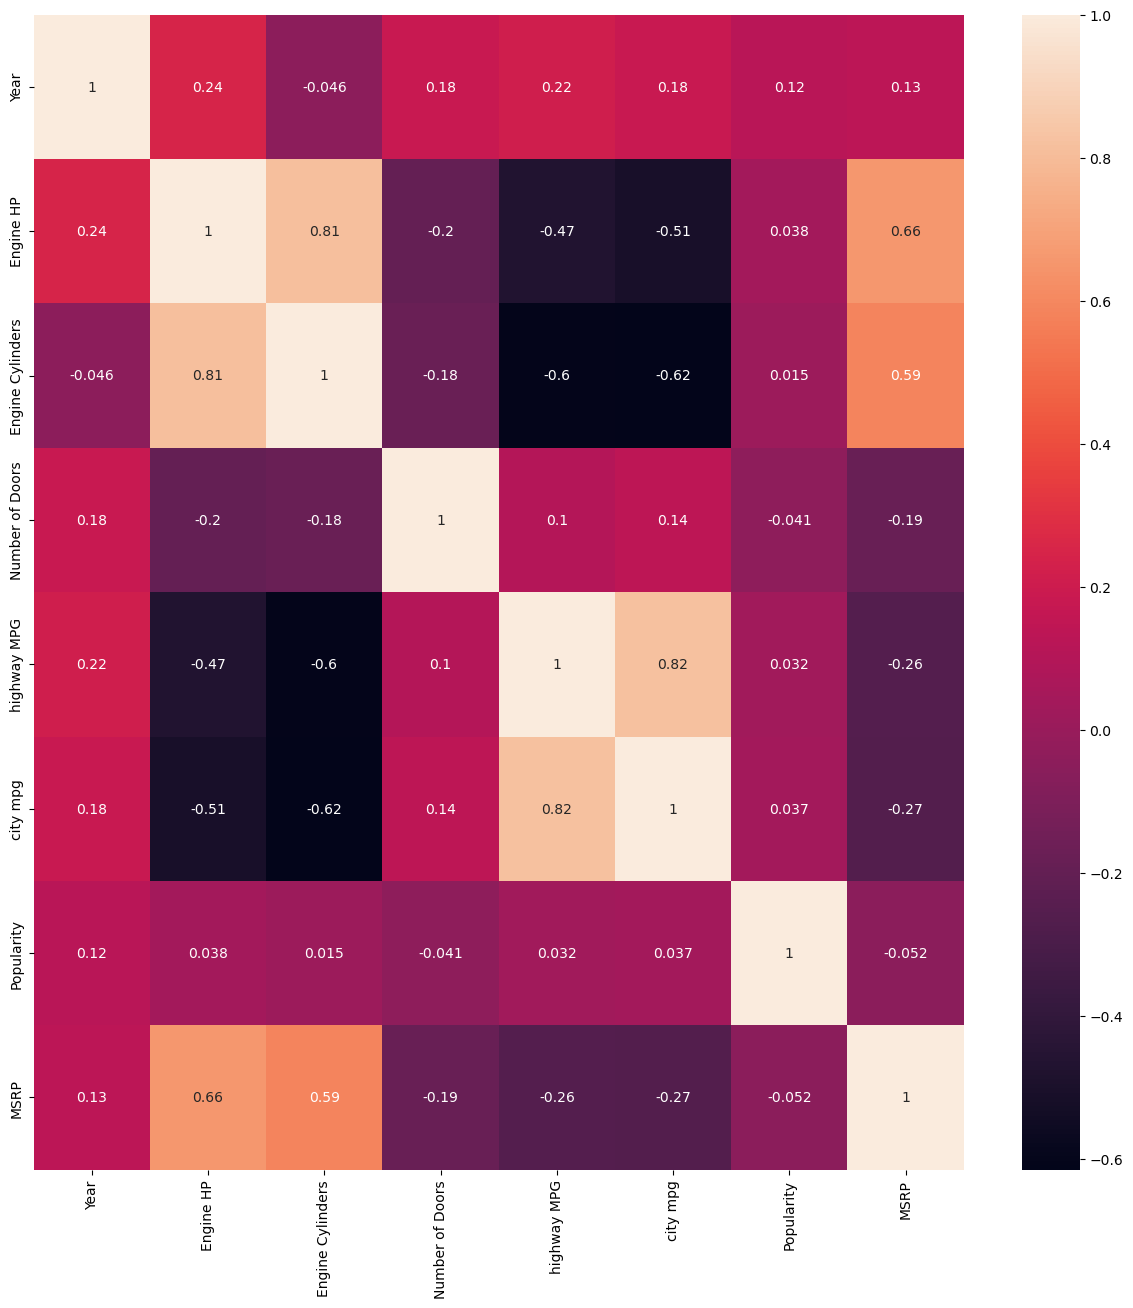

In [16]:
fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(data.corr(),annot = True)

In [42]:
data.describe()

,Year,Engine_HP,Engine_Cylinders,Number_of_Doors,highway_MPG,city_mpg,Popularity,MSRP
count,8085.000000,8085.000000,8085.00000,8085.000000,8085.000000,8085.000000,8085.000000,8.085000e+03
mean,2012.058751,274.689301,5.77885,3.413976,26.649598,19.552628,1499.555473,5.010296e+04
std,6.317599,115.072511,1.88724,0.898169,7.720904,7.160153,1413.839229,7.034154e+04
min,1990.000000,55.000000,0.00000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2010.000000,192.000000,4.00000,2.000000,22.000000,16.000000,549.000000,2.592000e+04
50%,2015.000000,264.000000,6.00000,4.000000,26.000000,18.000000,1013.000000,3.501000e+04
75%,2016.000000,320.000000,6.00000,4.000000,30.000000,22.000000,2009.000000,4.874500e+04
max,2017.000000,1001.000000,16.00000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


In [43]:
data.describe(include="object").T


,count,unique,top,freq
Make,8085,47,Chevrolet,614
Model,8085,713,F-150,122
Engine_Fuel_Type,8085,8,regular unleaded,3507
Transmission_Type,8085,5,AUTOMATIC,5761
Driven_Wheels,8085,4,front wheel drive,2879
Market_Category,8085,70,Crossover,1103
Vehicle_Size,8085,3,Midsize,3187
Vehicle Style,8085,16,4dr SUV,2093


# Exploratory Data Analysis (EDA)

               Make
Chevrolet       614
Volkswagen      581
Ford            492
Cadillac        397
Mercedes-Benz   352
BMW             334
Infiniti        330
Audi            328
Dodge           320
Nissan          308
Toyota          300
Honda           282
Volvo           281
GMC             270
Acura           252
Mazda           239
Subaru          214
Hyundai         214
Lexus           202
Lincoln         156
Land Rover      143
Porsche         136
Mitsubishi      125
Buick           125
Saab            111
Kia             109
Chrysler        108
Suzuki           99
Aston Martin     93
Pontiac          77
Bentley          74
Ferrari          69
Maserati         58
Lamborghini      52
Scion            48
Plymouth         39
FIAT             38
Rolls-Royce      31
Lotus            29
HUMMER           17
Maybach          16
Alfa Romeo        5
McLaren           5
Spyker            3
Genesis           3
Oldsmobile        3
Bugatti           3


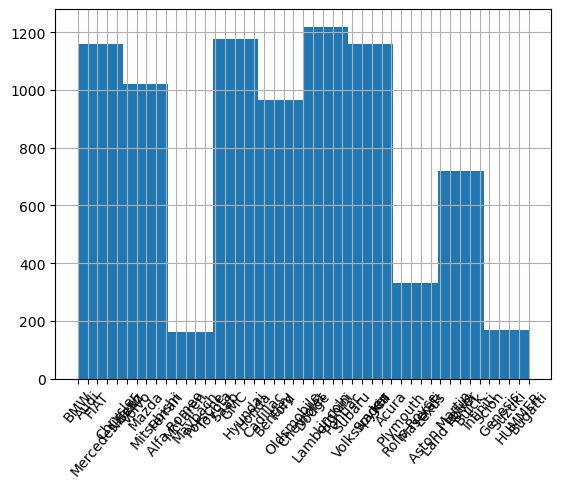

In [44]:
print(data['Make'].value_counts().to_frame())
plt.hist(data['Make'],rwidth=1)
plt.xticks(rotation=50)
plt.grid()
plt.show()

In [50]:
#4.Modeling

In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8085 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               8085 non-null   object 
 1   Model              8085 non-null   object 
 2   Year               8085 non-null   int64  
 3   Engine_Fuel_Type   8085 non-null   object 
 4   Engine_HP          8085 non-null   float64
 5   Engine_Cylinders   8085 non-null   float64
 6   Transmission_Type  8085 non-null   object 
 7   Driven_Wheels      8085 non-null   object 
 8   Number_of_Doors    8085 non-null   float64
 9   Market_Category    8085 non-null   object 
 10  Vehicle_Size       8085 non-null   object 
 11  Vehicle Style      8085 non-null   object 
 12  highway_MPG        8085 non-null   int64  
 13  city_mpg           8085 non-null   int64  
 14  Popularity         8085 non-null   int64  
 15  MSRP               8085 non-null   int64  
dtypes: float64(3), int64(5)

In [53]:
#Encoding
#Except the target column (MSRP), all other features are to encoded

from sklearn.preprocessing import LabelEncoder
class_en = LabelEncoder()
data['Make']=class_en.fit_transform(data['Make'])
data['Model']=class_en.fit_transform(data['Model'])
data['Engine_Fuel_Type']=class_en.fit_transform(data['Engine_Fuel_Type'])
data['Transmission_Type']=class_en.fit_transform(data['Transmission_Type'])
data['Driven_Wheels']=class_en.fit_transform(data['Driven_Wheels'])
data['Market_Category']=class_en.fit_transform(data['Market_Category'])
data['Vehicle_Size']=class_en.fit_transform(data['Vehicle_Size'])
data['Vehicle Style']=class_en.fit_transform(data['Vehicle Style'])

In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8085 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               8085 non-null   int64  
 1   Model              8085 non-null   int64  
 2   Year               8085 non-null   int64  
 3   Engine_Fuel_Type   8085 non-null   int32  
 4   Engine_HP          8085 non-null   float64
 5   Engine_Cylinders   8085 non-null   float64
 6   Transmission_Type  8085 non-null   int32  
 7   Driven_Wheels      8085 non-null   int32  
 8   Number_of_Doors    8085 non-null   float64
 9   Market_Category    8085 non-null   int32  
 10  Vehicle_Size       8085 non-null   int32  
 11  Vehicle Style      8085 non-null   int32  
 12  highway_MPG        8085 non-null   int64  
 13  city_mpg           8085 non-null   int64  
 14  Popularity         8085 non-null   int64  
 15  MSRP               8085 non-null   int64  
dtypes: float64(3), int32(6)

In [55]:
# Splitting the dataset into features and target set.
x=data.drop(['MSRP'],axis=1)
y=pd.DataFrame(data['MSRP'])

In [56]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.3)

In [57]:
x_train.head()

,Make,Model,Year,Engine_Fuel_Type,Engine_HP,Engine_Cylinders,Transmission_Type,Driven_Wheels,Number_of_Doors,Market_Category,Vehicle_Size,Vehicle Style,highway_MPG,city_mpg,Popularity
6226,33,377,2015,5,188.0,4.0,3,2,4.0,14,0,2,34,28,2009
150,4,12,2016,6,240.0,4.0,1,0,4.0,62,2,15,34,22,3916
1721,29,117,2000,4,143.0,6.0,3,3,2.0,40,0,10,21,16,586
4307,20,229,2013,5,325.0,6.0,1,0,4.0,16,2,3,24,17,190
9792,9,602,2017,7,138.0,4.0,3,2,4.0,49,0,2,39,28,1385


In [58]:
#Linear Regression
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)

In [59]:
from sklearn.metrics import mean_squared_error, r2_score
print(mean_squared_error(y_test,y_pred))
print(r2_score(y_test,y_pred))

2423738514.8707566
0.5111480365494474


In [60]:
y_test = pd.DataFrame(y_test)
y_pred = pd.DataFrame(y_pred)
table = pd.concat([y_test, y_pred], axis=1)
table = table.dropna()
table.columns = ['Actual Price','Predicted Price']
table.head()

,Actual Price,Predicted Price
2170,29205.0,244496.738740
345,45490.0,72407.131216
536,3613.0,79156.351647
1618,25795.0,43498.476204
2420,37820.0,203809.793680


In [61]:
#KNN Regressor
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=12)
knn.fit(x_train, y_train)
y_pred_knn = knn.predict(x_test)

In [62]:
from sklearn.metrics import mean_squared_error, r2_score
print(mean_squared_error(y_test,y_pred_knn))
print(r2_score(y_test,y_pred_knn))

1441408253.661202
0.7092775270051419


In [63]:
y_test = pd.DataFrame(y_test)
y_pred = pd.DataFrame(y_pred_knn)
table = pd.concat([y_test, y_pred], axis=1)
table = table.dropna()
table.columns = ['Actual Price','Predicted Price']
table.head()

,Actual Price,Predicted Price
2170,29205.0,271834.916667
345,45490.0,43740.833333
536,3613.0,44885.000000
1618,25795.0,55649.583333
2420,37820.0,220833.333333


In [64]:
#Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor(random_state=45,max_depth=16,n_estimators=200)
rf_reg.fit(x_train, y_train)
y_pred_rf = rf_reg.predict(x_test)

C:\Users\AbinPC\AppData\Local\Temp\ipykernel_15440\3479472157.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_reg.fit(x_train, y_train)


In [65]:
from sklearn.metrics import mean_squared_error, r2_score
print(mean_squared_error(y_test,y_pred_rf))
print(r2_score(y_test,y_pred_rf))

687779884.0491977
0.861279364635928


In [66]:
y_test = pd.DataFrame(y_test)
y_pred = pd.DataFrame(y_pred_rf)
table = pd.concat([y_test, y_pred], axis=1)
table = table.dropna()
table.columns = ['Actual Price','Predicted Price']
table.head()

,Actual Price,Predicted Price
2170,29205.0,289861.140000
345,45490.0,51950.416885
536,3613.0,44408.183728
1618,25795.0,55888.041751
2420,37820.0,189079.508512


In [ ]:
#Note:

Random Forest Regressor is having an r2 score value of 0.86 and is a comparatively good model.